In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family= font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

## 티켓값 인상에 따른 관람객 수 변화

In [2]:
final = pd.read_csv("data/월별관람객수.csv", index_col=[0])
final.head()

,관람객수
년월,
2008-01,12851835
2008-02,12845088
2008-03,9606955
2008-04,7330006
2008-05,12870573


Text(135, 200, '14000원')

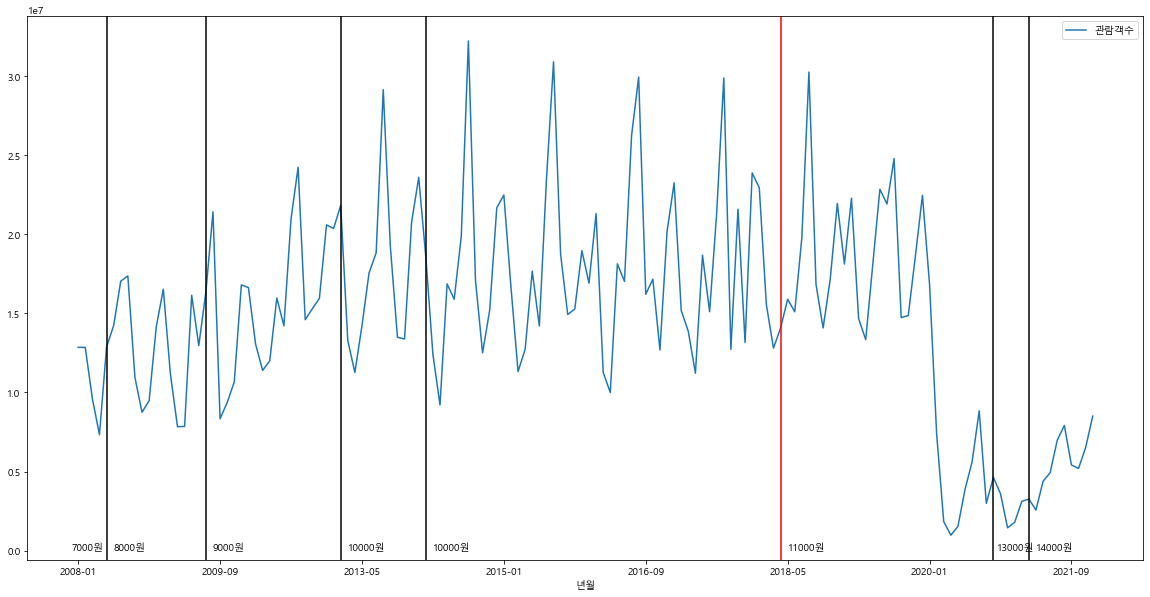

In [33]:
final.plot(figsize = (20,10))
plt.axvline(x=4, color = "black")
plt.axvline(x=18, color = "black")
plt.axvline(x=37, color = "black")
plt.axvline(x=49, color = "black") # 시간대를 더 나눠서 프라임 시간대 가격을 올림
#plt.axvline(x=75, color = "r") >> 가격이 오르지는 않고 가격 체계가 바뀜
plt.axvline(x=99, color = "r")
plt.axvline(x=129, color = "black")
plt.axvline(x=134, color = "black")

plt.text(-1, 200, "7000원")
plt.text(5, 200, "8000원")
plt.text(19,200, "9000원")
plt.text(38, 200, "10000원")
plt.text(50, 0, "10000원")
plt.text(100,200, "11000원")
plt.text(129.5, 200, "13000원")
plt.text(135, 200, "14000원")

# 주말 2D가격 기준
# 2000.12월 6000 >7000원,
# 2008.5월 8000원
# 2009.7월 9000원
# 2013.2월 10000원
# 2014.2월 10000원(2D, 3D차등제 실시)
# 2016.4월 11000원(프라임존), 스탠다드 10000원 그대로
# 2018.4월 12000원(프라임존), 스탠다드 11000원(1000원 인상)
# 2020.10월 13000원(좌석 차등제 폐지)
# 2021.3월 14000원

# 가격이 10000원이 넘어간 이후 가격이 오를 때마다 관객수가 떨어짐
# 2018년 4월에는 가격이 떨어짐에도 불구하고 오른 관객수가 증가했는데
    # 이때는 '어벤져스:인피니티워'가 개봉한 달로 특수 상황이라고 볼 수 있다.

## 코로나 확진자 수와 영화관람객수 추이 확인

In [35]:
number = pd.read_csv("data/영화코로나.csv")
number.head()

,년월,관람객수,covid
0,2020-03,1834722,5560.0
1,2020-04,972572,1241.0
2,2020-05,1526236,703.0
3,2020-06,3864533,1385.0
4,2020-07,5618701,1509.0


<AxesSubplot:xlabel='년월'>

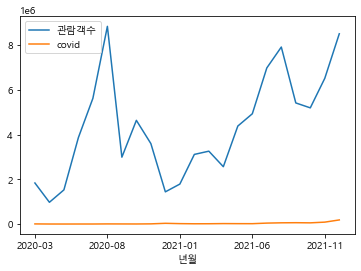

In [37]:
number = number.set_index("년월")
number.plot()

<AxesSubplot:xlabel='년월'>

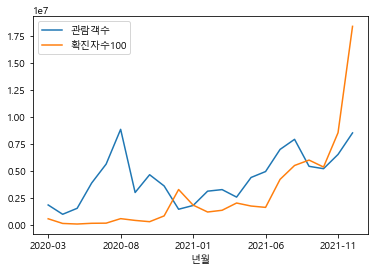

In [38]:
number["확진자수100"] = number["covid"]*100
number[["관람객수","확진자수100"]].plot()

In [51]:
len(number)
corona = number["확진자수100"][0:21]
corona.index = number.index[1:22]
movie = number["관람객수"][1:22]
number2 = pd.DataFrame({"이번달관람객수":movie, "지난달확진자수(100배)":corona})
number2

,이번달관람객수,지난달확진자수(100배)
년월,,
2020-04,972572,556000.0
2020-05,1526236,124100.0
2020-06,3864533,70300.0
2020-07,5618701,138500.0
2020-08,8834699,150900.0
2020-09,2988647,568500.0
2020-10,4633609,405100.0
2020-11,3595310,286400.0
2020-12,1438873,821900.0


Text(13, 200, '14000원')

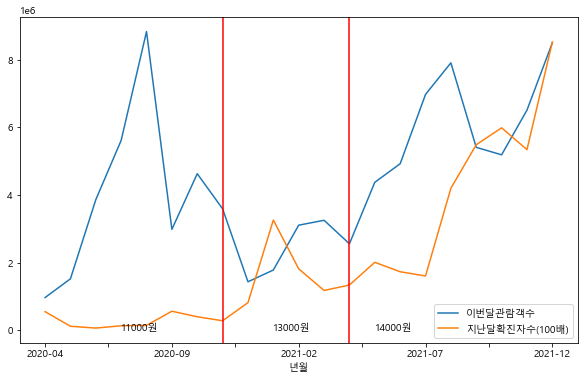

In [57]:
number2.plot(figsize=(10,6))
plt.axvline(x=7, color = "r")
plt.axvline(x=12, color = "r")
plt.text(3, 5, "11000원")
plt.text(9, 200, "13000원")
plt.text(13,200, "14000원")

Text(15, 200, '14000원')

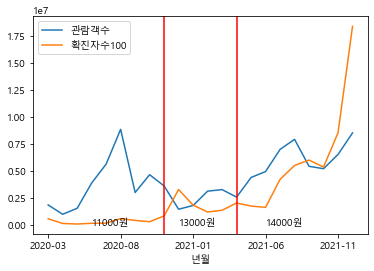

In [39]:
number["확진자수100"] = number["covid"]*100
number[["관람객수","확진자수100"]].plot()
plt.axvline(x=8, color = "r")
plt.axvline(x=13, color = "r")
plt.text(3, 5, "11000원")
plt.text(9, 200, "13000원")
plt.text(15,200, "14000원")


# 코로나 기간동안 티켓값 인상 때를 표시했습니다. 

## 확진자수 증감률과 관람객수 증감률 관계확인

In [6]:
rate1 = pd.read_csv("data/전국증감률.csv")
rate1.head()


,확진자수증감,관람객수증감
0,0.000000,0.000000
1,-0.776799,-0.469908
2,-0.433521,0.569278
3,0.970128,1.532068
4,0.089531,0.453915


<AxesSubplot:xlabel='년월'>

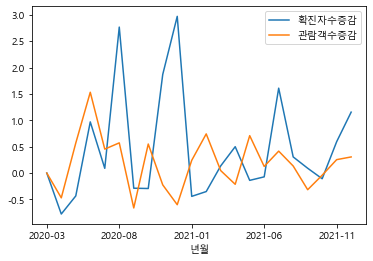

In [21]:
rate1.index = number.index
rate1.plot()

### 코로나 확진자 수 증감이 다음달 영화관람에 영향을 미치는지 확인

In [5]:
effect = pd.read_csv("data/다음달영향.csv")
effect.head()

,확진자수증감,관람객수증감
0,0.000000,-0.469908
1,-0.776799,0.569278
2,-0.433521,1.532068
3,0.970128,0.453915
4,0.089531,0.572374


In [8]:
patient = rate1["확진자수증감"][0:21]
client = rate1["관람객수증감"][1:22]
patient.index = rate1.index[1:]

In [9]:
effect_final = pd.DataFrame({"확진자수증감":patient, "관람객수증감":client})
effect_final.columns = ["지난달확진자수증감률","이번달관람객수증감률"]
effect_final

,지난달확진자수증감률,이번달관람객수증감률
1,0.000000,-0.469908
2,-0.776799,0.569278
3,-0.433521,1.532068
4,0.970128,0.453915
5,0.089531,0.572374
6,2.767396,-0.661715
7,-0.287423,0.550404
8,-0.293014,-0.224080
9,1.869763,-0.599792
10,2.971043,0.241331


In [15]:
final.index

Index(['2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', '2008-10',
       ...
       '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10', '2021-11', '2021-12'],
      dtype='object', name='년월', length=144)

In [40]:
effect_final.index = number.index[1:]
effect_final

,지난달확진자수증감률,이번달관람객수증감률
년월,,
2020-04,0.000000,-0.469908
2020-05,-0.776799,0.569278
2020-06,-0.433521,1.532068
2020-07,0.970128,0.453915
2020-08,0.089531,0.572374
2020-09,2.767396,-0.661715
2020-10,-0.287423,0.550404
2020-11,-0.293014,-0.224080
2020-12,1.869763,-0.599792


<AxesSubplot:xlabel='년월'>

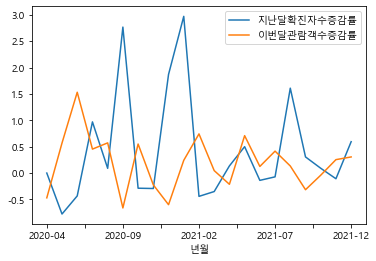

In [41]:
effect_final.plot()

### 상관관계는 통계처리2.html참고!